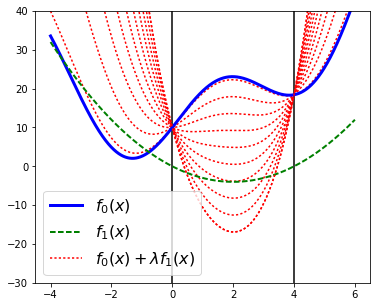

In [25]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
from matplotlib.backends.backend_pdf import PdfPages

import matplotlib.pyplot as plt

x = np.linspace(-4, 6, 1000)


def f0(x):
    return x**2 + 10*np.sin(x) + 10
def f1(x):
    return (x - 2)**2 - 4

y = f0(x)

z = f1(x)

with PdfPages('dual_func.pdf') as pdf:
	fig = plt.figure(figsize=(6, 5)) 
	plt.plot([-0, -0], [-50, 120], 'k-')
	plt.plot([4, 4], [-50, 120], 'k-')
	for l in np.linspace(0.2, 10, 10):
	    y1 = y + l*z;
	    plt.plot(x, y1, 'r:')
	    
	 
	plt.plot(x, y, 'b-', linewidth = 3, label = '$f_0(x)$')
	plt.plot(x, z, 'g--', linewidth = 2, label = '$f_1(x)$')


	plt.plot(x, y1, 'r:', label = '$f_0(x) + \lambda f_1(x)$')   
	plt.ylim([-30, 40])
	plt.legend(loc = "best", fontsize = 16)
	pdf.savefig()  # saves the current figure into a pdf page 

	plt.show()
	plt.close()

9.99999954612


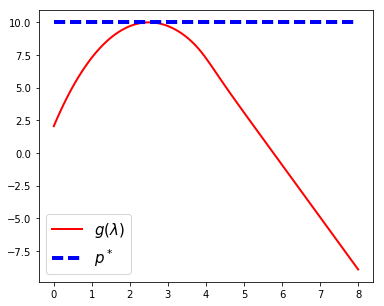

-1.30644008572
-0.779015012396


In [26]:
def grad(l, x):
    return 2*x + 10*np.cos(x)+2*l*(x-2)

def Lagrange(l, x):
    return x**2 + 10*np.sin(x) + 10 + l*((x - 2)**2 - 4)
def sol(l, x0, eta):
    max_iter = 1000;
    it = 0
    x = x0  
    while it < max_iter:
        it += 1 
        x -= eta*grad(l, x);
#         if x < 0:
#             x = 0
#         elif x> 4:
#             x = 4
        if grad(l, x)**2 < 1e-12:
            break
    return x 

p = Lagrange(0, 0)

l = np.linspace(0, 8, 100);
yl = []
for i in range(len(l)):
    x0 = sol(l[i], 1, 0.001)
    yl.append(Lagrange(l[i], x0))
    
print(np.amax(yl))
with PdfPages('dual_func2.pdf') as pdf:   
    fig = plt.figure(figsize=(6, 5)) 
    plt.plot(l, yl, 'r', linewidth = 2, label = '$g(\lambda)$')
    plt.plot([0, 8], [p, p], 'b--', linewidth = 4, label = '$p^*$')
    plt.legend(loc = "best", fontsize = 15)
    pdf.savefig() 
    plt.show()    
    plt.close()             
                     
print(sol(0, -4, 0.01))
print(sol(1, -4, 0.01))

In [26]:
p = Lagrange(0, sol(0, 1, 0.01))
x0 = sol(0, 1, 0.01)
print(x0)

0
